In [1]:
library('igraph')
library('Matrix')
library('pracma')
library(repr)
options(repr.plot.width=4,repr.plot.height=4)
options(repr.hist.width=4,repr.hist.height=4)

Warning message:
"package 'igraph' was built under R version 3.4.4"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'pracma' was built under R version 3.4.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu

Warning message:
"package 'repr' was built under R version 3.4.4"

In [62]:
#Q2.1.a
set.seed(0)
g <- erdos.renyi.game(1000, 0.01)
diameter(g)

[1] 6

In [54]:
#Q2.1.b
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}


In [55]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    dist = c()
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        dist[i] <- shortest.paths(g,start_node,v)
    }
    
    return(dist)
}

In [56]:
t<-100

In [57]:
distance_total<-seq(0,0,length.out=t)
total_list <- list()
t_arr<-seq(1,t,1)

In [58]:
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    distance = random_walk(g, t, v_start)
    total_list[[i]] <- distance 
    distance_total<-distance_total+distance   
}
distance_total<-distance_total/100

In [59]:
sd <- seq(0,0,length.out=t)
for(i in seq(1,100,1)) {
    sd<-sd+`^`(total_list[[i]]-distance_total,2)
}
sd<-sd/100

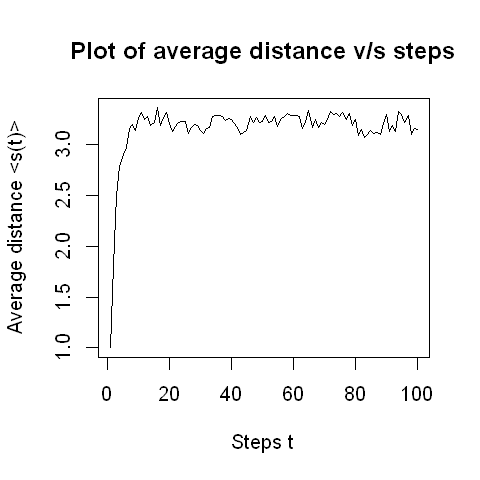

In [60]:
plot(t_arr,distance_total,type="l",main="Plot of average distance v/s steps", xlab="Steps t", ylab="Average distance <s(t)>")

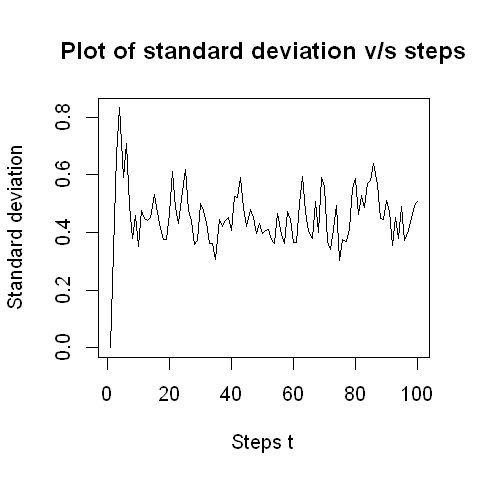

In [61]:
plot(t_arr,sd,type="l",main="Plot of standard deviation v/s steps", xlab="Steps t", ylab="Standard deviation")

In [11]:
#2.1.c
random_walk_deg = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    dist = c()
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
    }
    
    return(degree(g,v))
}

In [12]:
degree_list <- c()

In [13]:
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    degree_list[i] = random_walk_deg(g, t, v_start)  
}
dg <- table(degree_list)/100

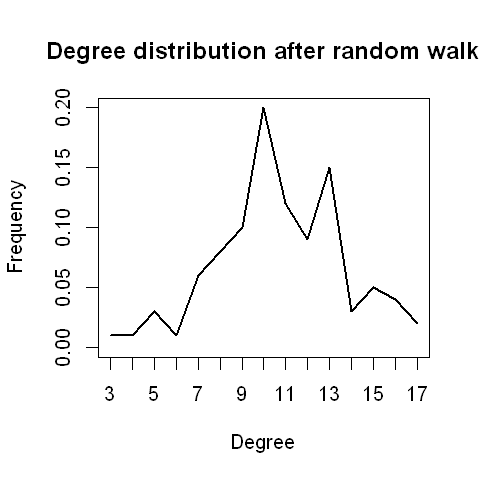

In [19]:
plot(dg,type="l",main="Degree distribution after random walk", xlab="Degree", ylab="Frequency")

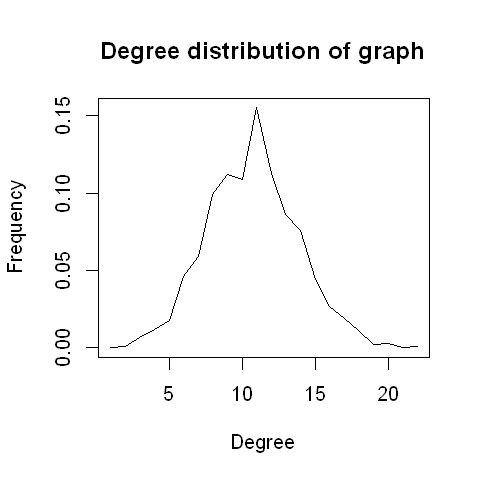

In [20]:
plot(degree.distribution(g),type="l",main="Degree distribution of graph", xlab="Degree", ylab="Frequency")

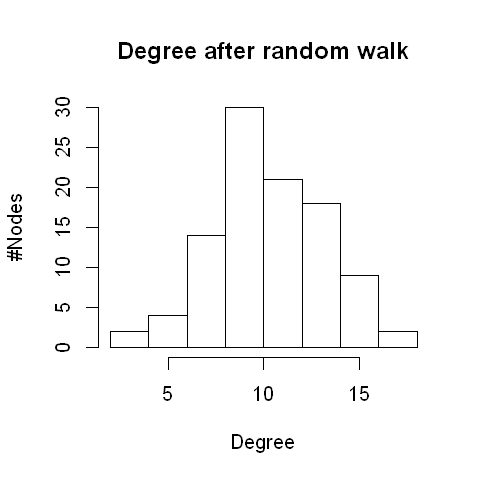

In [29]:
hist(degree_list,main="Degree after random walk", xlab="Degree", ylab="#Nodes")

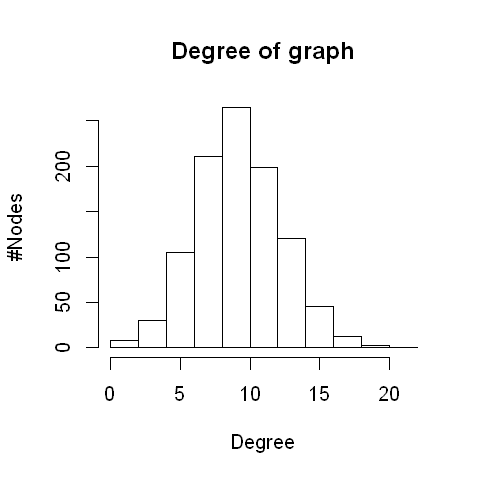

In [30]:
hist(degree(g),main="Degree of graph", xlab="Degree", ylab="#Nodes")

In [64]:
#2.1.d
set.seed(0)
g1 <- erdos.renyi.game(100, 0.01)
#diameter(g1)
#a = is.connected(g1)
#vcount(g1)
if(a==FALSE) {
        sub_graph <-induced.subgraph(g1,c(1:10))
        g1.components <- clusters(g1)
        ix <- which.max(g1.components$csize)
        g1.giant <- induced.subgraph(g1, which(g.components$membership == ix))
        gcc_size <- vcount(g1.giant)
        g1=g1.giant
    }
#is.connected(g1)
#vcount(g1)
diameter(g1)

distance_total_1<-seq(0,0,length.out=t)
total_list_1 <- list()
t_arr_1<-seq(1,t,1)

for (i in seq(1,100,1)) {
    v_start = sample(vcount(g1), 1)
    distance = random_walk(g1, t, v_start)
    total_list_1[[i]] <- distance 
    distance_total_1<-distance_total_1+distance   
}
distance_total_1<-distance_total_1/100

sd_1 <- seq(0,0,length.out=t)
for(i in seq(1,100,1)) {
    sd_1<-sd_1+`^`(total_list_1[[i]]-distance_total_1,2)
}
sd_1<-sd_1/100

[1] 10

[1] 100

[1] TRUE

[1] 22

[1] 10

In [51]:
is.connected(g1)

[1] TRUE

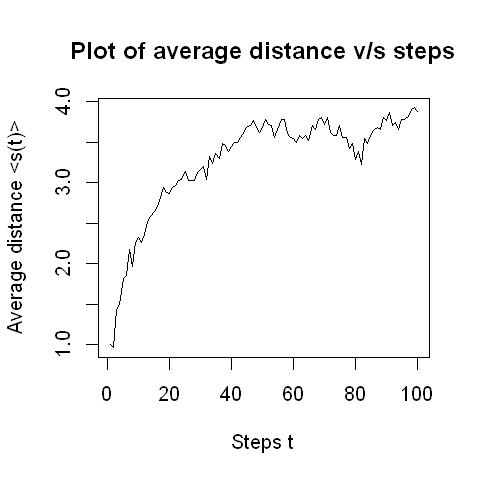

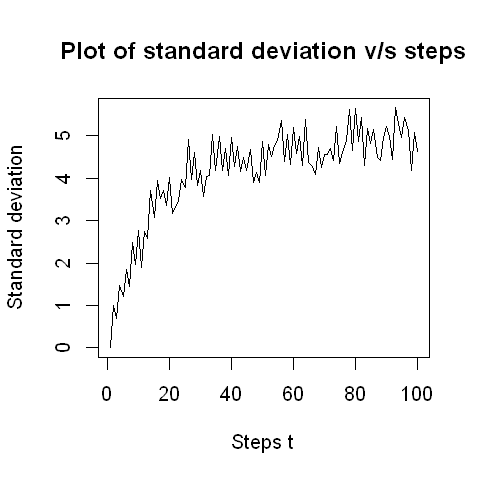

In [52]:
plot(t_arr_1,distance_total_1,type="l",main="Plot of average distance v/s steps", xlab="Steps t", ylab="Average distance <s(t)>")
plot(t_arr_1,sd_1,type="l",main="Plot of standard deviation v/s steps", xlab="Steps t", ylab="Standard deviation")

In [ ]:
g2 <- erdos.renyi.game(10000, 0.01)
diameter(g2)
distance_total_2<-seq(0,0,length.out=t)
total_list_2 <- list()
t_arr_2<-seq(1,t,1)

for (i in seq(1,100,1)) {
    v_start = sample(vcount(g2), 1)
    distance = random_walk(g2, t, v_start)
    total_list_2[[i]] <- distance 
    distance_total_2<-distance_total_2+distance   
}
distance_total_2<-distance_total_2/100

sd_2 <- seq(0,0,length.out=t)
for(i in seq(1,100,1)) {
    sd_2<-sd_2+`^`(total_list_2[[i]]-distance_total_2,2)
}
sd_2<-sd_2/100

[1] 3

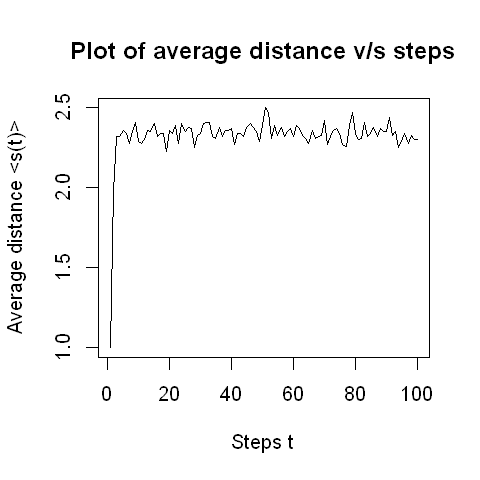

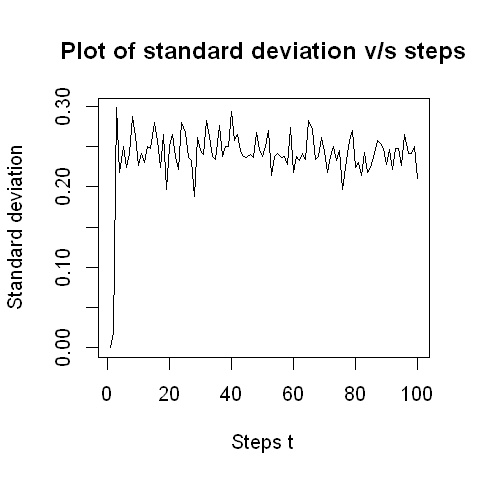

In [28]:
plot(t_arr_2,distance_total_2,type="l",main="Plot of average distance v/s steps", xlab="Steps t", ylab="Average distance <s(t)>")
plot(t_arr_2,sd_2,type="l",main="Plot of standard deviation v/s steps", xlab="Steps t", ylab="Standard deviation")

In [31]:
#Q2.2.a
g3 <- barabasi.game(1000, m=1, directed=FALSE)
t<-100

#Q2.2.b
distance_total_3<-seq(0,0,length.out=t)
total_list_3 <- list()
t_arr_3<-seq(1,t,1)

for (i in seq(1,100,1)) {
    v_start = sample(vcount(g3), 1)
    distance = random_walk(g3, t, v_start)
    total_list_3[[i]] <- distance 
    distance_total_3<-distance_total_3+distance   
}

distance_total_3<-distance_total_3/100

sd_3 <- seq(0,0,length.out=t)
for(i in seq(1,100,1)) {
    sd_3<-sd_3+`^`(total_list_3[[i]]-distance_total_3,2)
}

sd_3<-sd_3/100

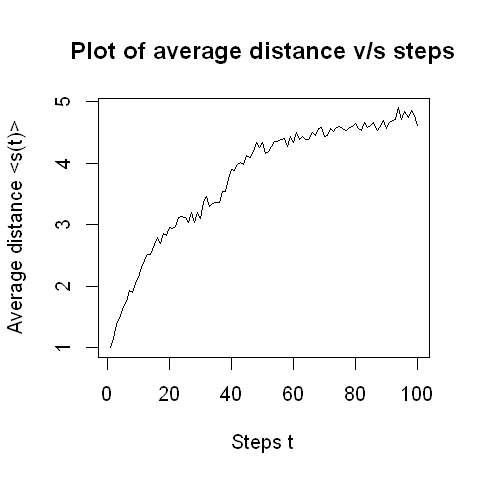

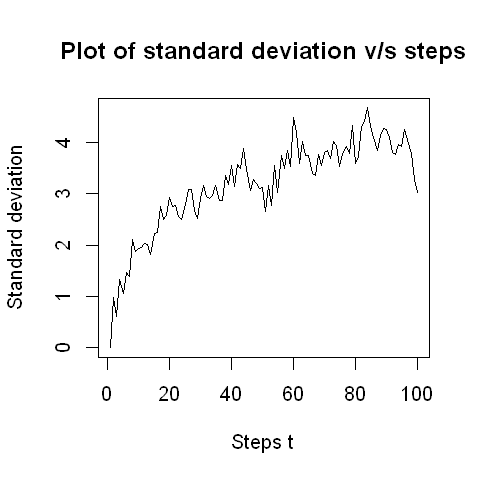

In [33]:
plot(t_arr_3,distance_total_3,type="l",main="Plot of average distance v/s steps", xlab="Steps t", ylab="Average distance <s(t)>")
plot(t_arr_3,sd_3,type="l",main="Plot of standard deviation v/s steps", xlab="Steps t", ylab="Standard deviation")

In [34]:
#Q2.2.c
degree_list_3 <- c()

for (i in seq(1,100,1)) {
    v_start = sample(vcount(g3), 1)
    degree_list_3[i] = random_walk_deg(g3, t, v_start)  
}

dg_3 <- table(degree_list_3)/100

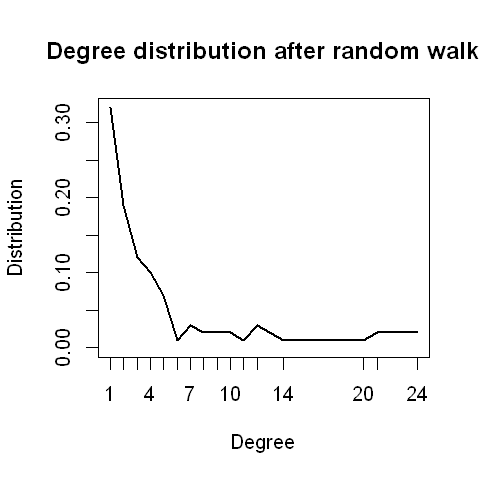

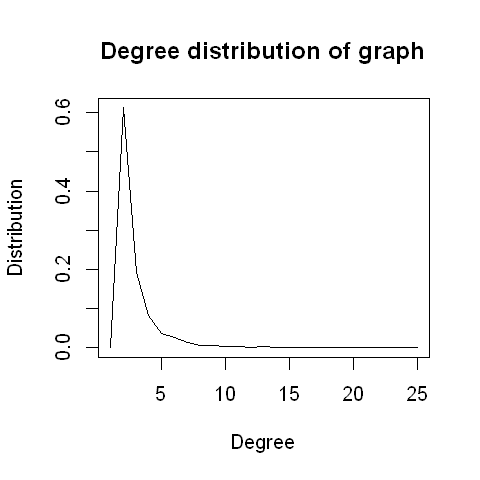

In [36]:
plot(dg_3,type="l",main="Degree distribution after random walk", xlab="Degree", ylab="Distribution")
plot(degree.distribution(g3),type="l",main="Degree distribution of graph", xlab="Degree", ylab="Distribution")

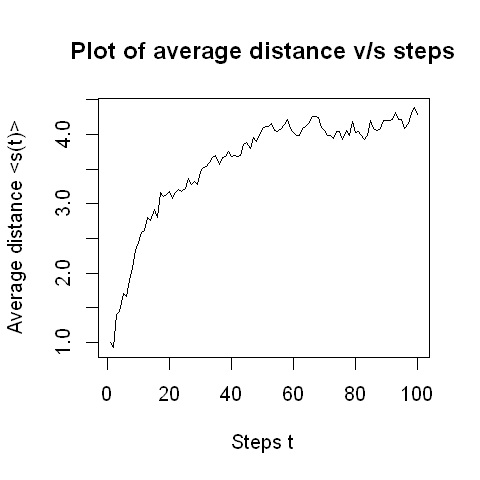

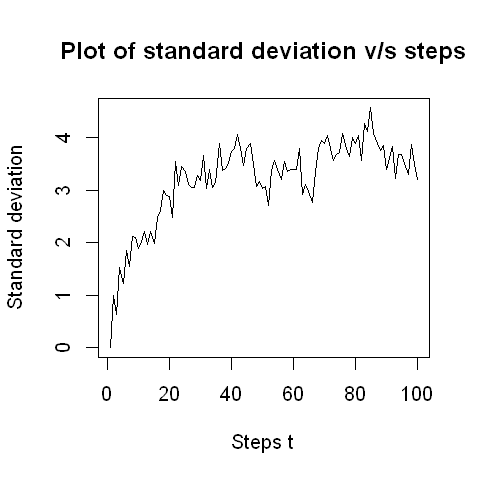

In [37]:
#2.2.d

g4 <- barabasi.game(100, m=1, directed=FALSE)
t<-100

distance_total_4<-seq(0,0,length.out=t)
total_list_4 <- list()
t_arr_4<-seq(1,t,1)

for (i in seq(1,100,1)) {
    v_start = sample(vcount(g4), 1)
    distance = random_walk(g4, t, v_start)
    total_list_4[[i]] <- distance 
    distance_total_4<-distance_total_4+distance   
}

distance_total_4<-distance_total_4/100

sd_4 <- seq(0,0,length.out=t)
for(i in seq(1,100,1)) {
    sd_4<-sd_4+`^`(total_list_4[[i]]-distance_total_4,2)
}

sd_4<-sd_4/100

plot(t_arr_4,distance_total_4,type="l",main="Plot of average distance v/s steps", xlab="Steps t", ylab="Average distance <s(t)>")
plot(t_arr_4,sd_4,type="l",main="Plot of standard deviation v/s steps", xlab="Steps t", ylab="Standard deviation")


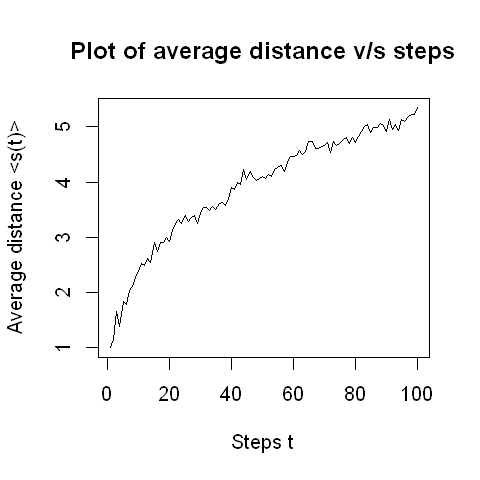

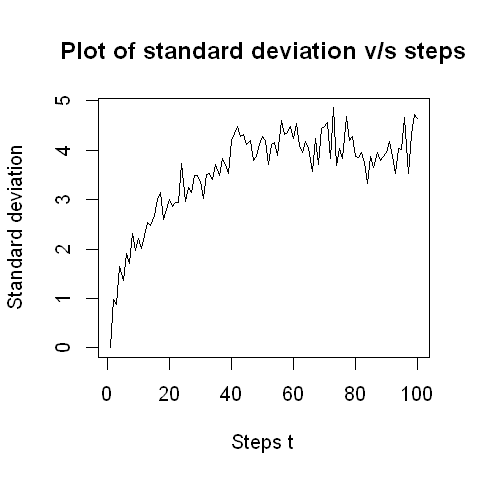

In [38]:
#2.2.d

g5 <- barabasi.game(10000, m=1, directed=FALSE)
t<-100

distance_total_5<-seq(0,0,length.out=t)
total_list_5 <- list()
t_arr_5<-seq(1,t,1)

for (i in seq(1,100,1)) {
    v_start = sample(vcount(g5), 1)
    distance = random_walk(g5, t, v_start)
    total_list_5[[i]] <- distance 
    distance_total_5<-distance_total_5+distance   
}

distance_total_5<-distance_total_5/100

sd_5 <- seq(0,0,length.out=t)
for(i in seq(1,100,1)) {
    sd_5<-sd_5+`^`(total_list_5[[i]]-distance_total_5,2)
}

sd_5<-sd_5/100

plot(t_arr_5,distance_total_5,type="l",main="Plot of average distance v/s steps", xlab="Steps t", ylab="Average distance <s(t)>")
plot(t_arr_5,sd_5,type="l",main="Plot of standard deviation v/s steps", xlab="Steps t", ylab="Standard deviation")